## Logistic Regression for single class classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_excel("flatprices.xlsx", sheet_name="insurance_data")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


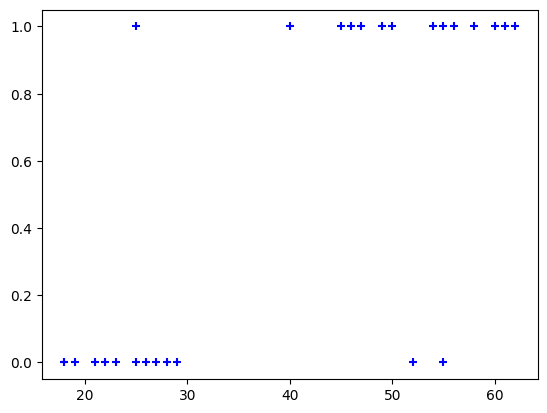

In [2]:
plt.scatter(df['age'],df['bought_insurance'],marker='+',color='blue')   # df['age'] is same as df.age

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(df[['age']],df.bought_insurance,test_size=0.1)   # use Shift+Tab for more info
x_test

,age
16,25
1,25
19,18


In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [5]:
model.predict(x_test)

array([0, 0, 0], dtype=int64)

In [6]:
model.score(x_test, y_test)

0.6666666666666666

In [7]:
prob=model.predict_proba(x_test)   # gives probability for x_test to buy insurance or not
prob  # [prob. that person will not buy insurance or p(0), prob. that person will buy insurance or p(1)]

array([[0.93744376, 0.06255624],
       [0.93744376, 0.06255624],
       [0.97975535, 0.02024465]])

## Now, Logistic Regression for Multi-Class Classification

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [9]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

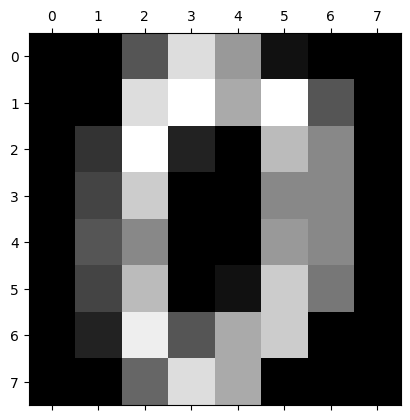

In [10]:
plt.gray()
plt.matshow(digits.images[0])

In [11]:
digits.target[0:15]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

In [12]:
len(digits.data)
len(digits.target)

1797

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(digits.data, digits.target,test_size=0.2)
print("length of x_train:",len(x_train),"\n"+"length of x_test:",len(x_test));

length of x_train: 1437 
length of x_test: 360


In [14]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=10000)  # it is giving error without max_iter bcz while training model reached max_iter limit
model.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [15]:
model.score(x_test,y_test)

0.9472222222222222

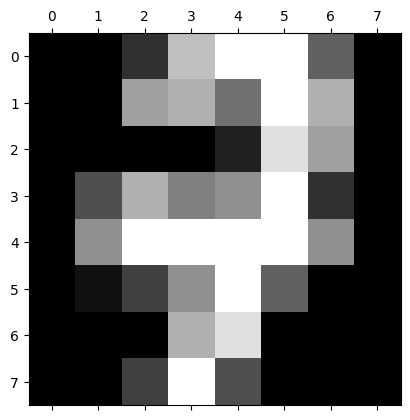

In [16]:
plt.matshow(digits.images[52])

In [17]:
digits.target[52]

7

In [18]:
model.predict([digits.data[52]])

array([7])

In [19]:
y_predicted=model.predict(x_test)
import numpy as np
from sklearn.metrics import confusion_matrix      # to check where our model fails using confusion matrix
cm=confusion_matrix(y_test,y_predicted)
sz=np.shape(cm)
print(sz)
cm

(10, 10)


array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  0,  2,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 34,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 39,  0,  0],
       [ 1,  3,  0,  0,  0,  0,  1,  0, 38,  0],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  1, 40]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

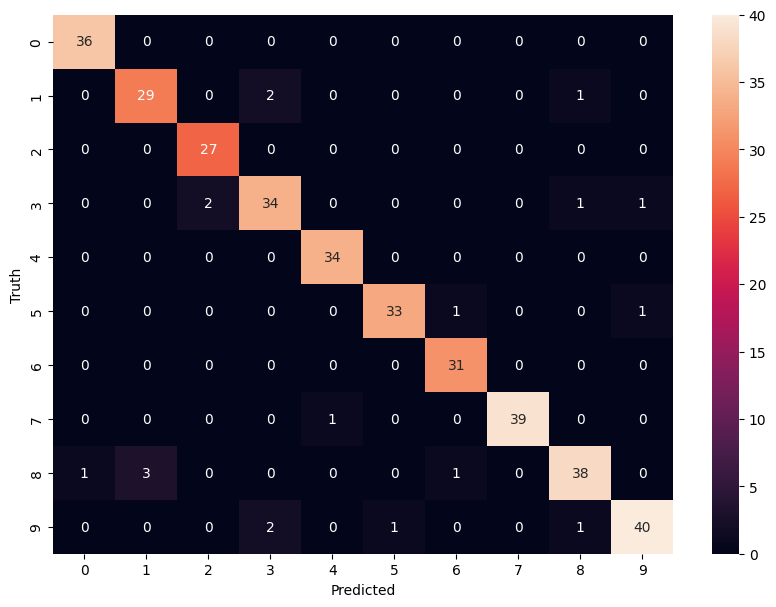

In [20]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')